In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


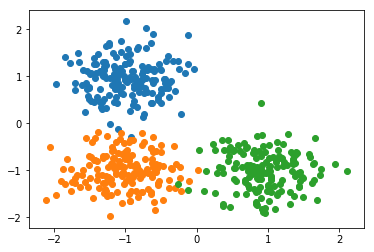

In [2]:
# Valores Iniciais e dados de entrada ---------------------------------------------------------------------------------
n_pts = 500
centers = [[-1, 1], [-1, -1], [1, -1]] # centro dos clustes de dados 0 -> -1,1, 1 -> -1,-1, 2 -> 1,-1
X, y = datasets.make_blobs(n_samples = n_pts, random_state = 123, centers = centers, cluster_std = 0.4) # cria os dados

plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

In [3]:
# Codifica as classes com o one hot encode -------------------------------------------------------------------------------
y_cat = to_categorical(y, 3) # categrias e n_o de categorias
# Classe 1 = [0. 0. 1.]
# Classe 2 = [0. 1. 0.]
# Classe 3 = [1. 0. 0.]
print(y_cat)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [4]:
# Cria a arquitetura da rede neural --------------------------------------------------------------------------------------
model = Sequential()
model.add(Dense(units = 3, input_shape = (2,), activation = 'softmax'))  # 3 saidas (0 1 2), 2 entrdas (x1, x2)
model.compile(Adam(0.1), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [5]:
# Treina a rede -----------------------------------------------------------------------------------------------------------
model.fit(x = X, y = y_cat, verbose = 0, batch_size = 50, epochs = 100)

[2]


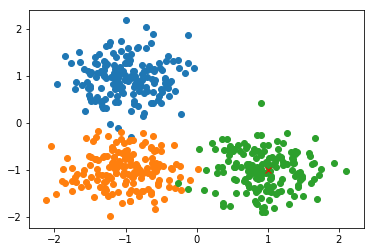

In [14]:
xt = 1.0
yt = -1.0
point = np.array([[xt, yt]])
prediction = model.predict_classes(point)
print(prediction)

plt.plot(xt,yt,'rx')
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()